In [2]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Testen

### 3. Chi-Squared Test for Independence

- Voorbeeld: Stel je wilt onderzoeken of er een verband is tussen rookgedrag (roker/niet-roker) en het hebben van longkanker (ja/nee). Je hebt een tabel met frequenties van rokers en niet-rokers die wel of geen longkanker hebben.
    - H0​: Er is geen verband tussen rookgedrag en longkanker (de variabelen zijn onafhankelijk).
    - H1​: Er is een verband tussen rookgedrag en longkanker (de variabelen zijn niet onafhankelijk).
    - Wordt gebruikt bij: Twee kwalitatieve variabelen. Het doel is te bepalen of er een significante afhankelijkheid bestaat tussen de twee variabelen.
    
### 4. Cramér's V
- Voorbeeld: Na het uitvoeren van een Chi-Squared Test for Independence over de vraag of geslacht (man/vrouw) en stemgedrag (partij A/partij B) gerelateerd zijn, gebruik je Cramér’s V om de sterkte van de associatie tussen deze twee variabelen te meten.
- Wat het doet: Cramér’s V geeft aan hoe sterk het verband is tussen de twee kwalitatieve variabelen. De waarde ligt tussen 0 (geen verband) en 1 (perfect verband).
- Wordt gebruikt bij: Twee kwalitatieve variabelen. Het meet de sterkte van de associatie na het vaststellen van afhankelijkheid met de Chi-Squared Test.

### 5. Goodness of Fit Test

- Voorbeeld: Stel je wilt testen of een dobbelsteen eerlijk is. Je rolt de dobbelsteen 60 keer en wilt weten of elke uitkomst (1 t/m 6) even vaak voorkomt als verwacht bij een eerlijke dobbelsteen (10 keer per uitkomst).
    - H0​: De dobbelsteen is eerlijk, d.w.z. elke uitkomst komt even vaak voor.
    - H1​: De dobbelsteen is niet eerlijk, d.w.z. de uitkomsten komen niet even vaak voor.

- Wordt gebruikt bij: Eén kwalitatieve variabele. Het doel is te testen of de geobserveerde frequentieverdeling overeenkomt met een verwachte verdeling.

### Gebruik bij Kwalitatieve Variabelen

- Chi-Squared Test for Independence en Cramér’s V worden beide gebruikt bij **twee kwalitatieve** variabelen om respectievelijk de onafhankelijkheid en de sterkte van hun relatie te testen.
    
- De Goodness of Fit Test wordt gebruikt bij **één kwalitatieve variabele** om te testen of de verdeling van de categorieën overeenkomt met een specifieke verwachte verdeling.

### Example Questions

- Is er een verschil in smaakvoorkeur tussen twee drankmerken?
- Is er een verschil in uitgaven bij het campusrestaurant tussen studenten en personeel?
- Sterven rokers vaker aan longkanker dan niet-rokers?
- Hebben mannen en vrouwen een verschillende mening over een enquêtevraag?

----

## Vraag 6 [7 pt] -> Chi-sqaured test

Het bestand bestellingen.csv bevat gegevens van 400 bestellingen
geplaatst bij een elektronica bedrijf gedurende een periode van meerdere
maanden. Voor elke bestelling vermeldt het bestand de tijd van de dag,
het type creditcard dat wordt gebruikt, de regio van het land
waar de klant woont,....   
We willen weten of er een verband bestaat tussen Time en Region

(1) Welke toets (met significantieniveau 5%) moet je gebruiken om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!  
(2) Formuleer de nulhypothese en de alternatieve hypothese  
(3) Maak een plot op basis waarvan je kan inschatten of nulhypothese zal verworpen worden (Geef bij de Antwoorden het commando voor deze plot)   
(4) Bereken de p-waarde  
(5) Trek een besluit op basis van de vorige stap en beantwoord de onderzoeksvraag.

Geef ook een antwoord op de volgende 2 vragen

(6) Bereken het totaal aantal bestelde Items door vrouwen (Female) op een dinsdag (Tue)  
(7) Geef de interkwartielafstand voor Total Cost  

In [ ]:
df = pd.read_csv('../dsai-ReeksA/bestellingen.csv', sep=';')
df.head()

In [ ]:
#6.3
observed = pd.crosstab(df.Time,df.Region)
observed.plot(kind='barh', stacked=True)

In [ ]:
#6.4
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

In [ ]:
#6.5
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)


In [ ]:
#6.6
gender = df[((df["Gender"] == "Female") & (df["Day"] == "Tue"))]["Items Ordered"].sum()
print(gender)

In [ ]:
#6.7
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]

print("Percentiles", percentiles, "\n", df['Total Cost'].quantile(percentiles))
print("Inter Quartile Range:", df['Total Cost'].quantile(.75) - df['Total Cost'].quantile(.25))
print("De interkwartielafstand van totale kost is: ", df['Total Cost'].quantile(.75) - df['Total Cost'].quantile(.25))


## Antwoorden Vraag 6

(6.1) 

Je gebruikt de Chi-sqaured test om te zien of er een verband tussen deze twee kwalitatieve variabelen.

(6.2)  

Formally, the procedure of the $\chi^2$ test for independence runs as follows:

1. Hypthesis:

   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)

Conclusion:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

(6.3)  

observed = pd.crosstab(df.Time,df.Region)
observed.plot(kind='barh', stacked=True)

(6.4)  

Chi-squared       : 3.5037
Degrees of freedom: 6
P-value           : 0.7435

(6.5)  

Critical value     : 12.5916
chi2: 3.5036 < g: 12.5916 => Op basis van de chi-kwadraat en de critical value dus de g zie je ook dat je de H0 niet gaat rejecten of weigeren, er is dus geen verband tussen de variabelen

(6.6) 

128

(6.7) 

Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00      6.8200
0.25     83.3225
0.50    126.7200
0.75    205.2450
1.00    485.0100
Name: Total Cost, dtype: float64
Inter Quartile Range: 121.92250000000001
De interkwartielafstand van totale kost is:  121.92250000000001


----

## Question 9 -> goodness of fit test

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [3]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})

In [8]:
product_counts = products['Choice'].value_counts()
chi2_stat, p_value = stats.chisquare(product_counts)
chi2_stat, p_value

(31.2, 1.6788275299956632e-07)

Choice
Product A     6
Product B    36
Product C    48
Name: Choice, dtype: int64
Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Critical value      g = 5.9915
Chi-squared        χ² = 31.2000
p-value             p = 0.0000


(31.2, 1.6788275299956632e-07)

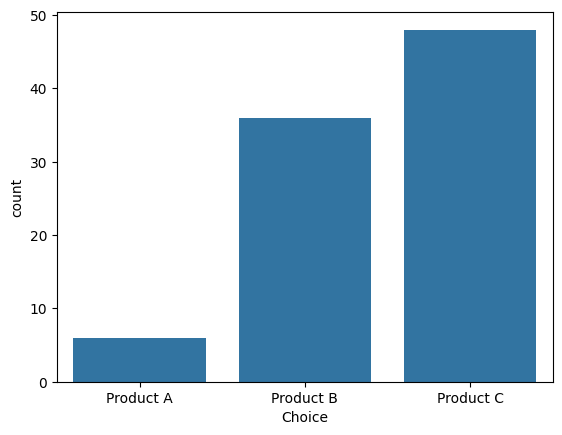

In [17]:
#1
sns.countplot(data =products , x = 'Choice')

#klanten hebben een voorkeur voor product B en C en zeker niet voor A

#2
# goodness of fit test om te kijken of er een gelijkmatige verdeling is van product A, product B  en product C over de klanten

#3  
types = ['Product A', 'Product B', 'Product C']
extra = products.groupby('Choice')['Choice'].count()
print(extra)
observed =   np.array(extra)
expected_p = np.array([1/3,1/3,1/3])


alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
#chi2, p = stats.chisquare(product_counts)
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Critical value      g = %.4f" % g)

#4
print("Chi-squared        χ² = %.4f" % chi2)
#5
print("p-value             p = %.4f" % p)

chi2, p


### Antwoorden 
1. countplot
2. goodness of fit test om te kijken of er een gelijkmatige verdeling is van product A, product B  en product C over de klanten
3.
- H0 -> de klanten hebben geen specifieke voorkeur voor een bepaald product
- H1 -> de klanten hebben wel een specifieke voorkeur voor een bepaald product

OR

- Null Hypothesis (H₀): Customers have no distinct preference, meaning the proportions of preferences for Products A, B, and C are equal.
- Alternative Hypothesis (H₁): Customers have a distinct preference, meaning the proportions of preferences for Products A, B, and C are not equal.
4. χ² = 31.2000
5. p-value: p = 1.6788275299956632e-07
6. p << 5%  => er is voldeonde aaleiding om de H0 te verwerpen 


----

## Vraag 9 [5 pt] -> Chi-kwadraat toets
Een Amerikaanse universiteit voerde voor het jaar 2003, 2004 en 2005 telkens een onafhankelijke en representatieve steekproef uit naar de politieke voorkeur van zijn studenten. (Democrat, Republican, Independent, Other)
Zijn er aanwijzigingen dat de politieke gezindheid verschilt per jaar voor 2003, 2004 en 2005?
Voer een test uit met 5% significance level om deze vraag te beantwoorden.

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [3]:
dfpolitiek = pd.DataFrame(data={
  'jaar': [2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005],
  'politieke_voorkeur': ["Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Other","Other","Other","Other","Other","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Other","Other","Other","Other","Other","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Dem","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Rep","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Ind","Other","Other","Other","Other","Other","Other"]
})

dfpolitiek.groupby('jaar').describe()

politieke_voorkeur                 
                  count unique  top freq
jaar                                    
2003                121      4  Ind   46
2004                120      4  Dem   40
2005                122      4  Ind   46

,jaar,politieke_voorkeur
0,2003,Dem
1,2003,Dem
2,2003,Dem
3,2003,Dem
4,2003,Dem


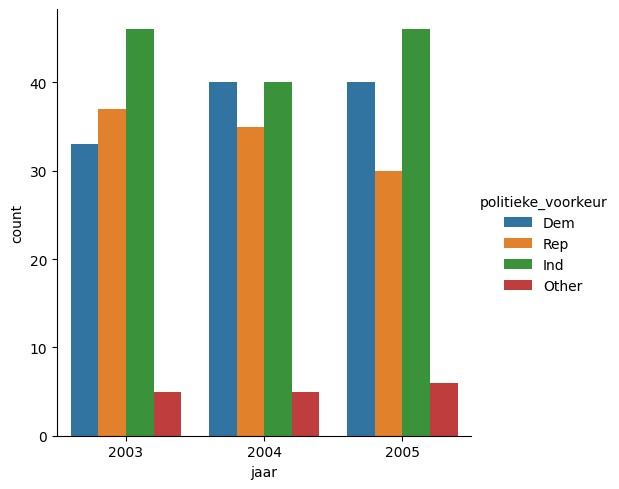

In [4]:
sns.catplot(dfpolitiek, x='jaar' ,hue='politieke_voorkeur',  kind='count');
dfpolitiek.head()

In [5]:
observed = pd.crosstab(dfpolitiek.jaar, dfpolitiek.politieke_voorkeur)
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 2.2841
Degrees of freedom: 6
P-value           : 0.8918


In [6]:
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

print("Chi-squared        : %.4f" % chi2)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi2, df=dof)
print("p-value            : %.4f" % p)

Chi-squared        : 2.2841
Degrees of freedom : 6
Critical value     : 12.5916
p-value            : 0.8918


### Antwoord vraag 9

1. Omdat we de verdelingen van categorische gegevens over meerdere onafhankelijke groepen willen vergelijken, passen we de Chi-kwadraat toets voor onafhankelijkheid toe.
2. 
- Nulhypothese (H₀): De verdeling van de politieke gezindheid van studenten is hetzelfde voor de jaren 2003, 2004 en 2005.
- Alternatieve hypothese (H₁​): De verdeling van de politieke gezindheid van studenten verschilt voor ten minste één van de jaren 2003, 2004 en 2005.
3. Chi-squared        : 2.2841
4. p-value            : 0.8918
5. De p-waarde van 0.8918 is veel groter dan het significantieniveau van 0.05. Dit betekent dat we de nulhypothese H₀​ niet verwerpen.

----

## Vraag 7 [6 pt] -> chi kwadraat test

In het Onderzoek Verplaatsingsgedrag Vlaanderen (2021-2022) vinden we de volgende cijfers in verband met de verdeling van het rijbewijsbezit volgens netto-inkomen op persoonsniveau voor personen vanaf 18 jaar (exclusief scholieren en studenten).  Is er een verband tussen het inkomen en het al dan niet hebben van een rijbewijs?

1. [1pt] Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!

2. [1pt] Formuleer de nulhypothese en de alternatieve hypothese

3. [1pt] Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde

4. [1pt] Bereken de p-waarde

5. [1pt] Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

6. [1pt] Hoeveel procent van de ondervraagden heeft geen rijbewijs?

In [7]:
dfrijbewijs = pd.DataFrame(data={
    'inkomen': ['0 - 1000 EUR', '1001 - 1500 EUR', '1501 - 2000 EUR', '2001 - 2500 EUR', '2501 - 3000 EUR', '>3000 EUR', 'wenst niet te antwoorden op deze vraag'],
    'ja': [149, 469, 800, 653, 325, 270, 230],
    'neen': [61, 157, 55, 20, 10, 4, 51]}).set_index('inkomen')

dfrijbewijs.tail()

,ja,neen
inkomen,,
1501 - 2000 EUR,800,55
2001 - 2500 EUR,653,20
2501 - 3000 EUR,325,10
>3000 EUR,270,4
wenst niet te antwoorden op deze vraag,230,51


In [4]:
observed = pd.crosstab(dfrijbewijs.ja, dfrijbewijs.index)
chi2, p, df, expected = stats.chi2_contingency(observed)
 
 
print("Chi-squared        χ² = %.4f" % chi2)
print("p-value             p = %.4f" % p)

sumJa = sum(dfrijbewijs.ja)
sumNeen = sum(dfrijbewijs.neen)
totaalSum = sumJa + sumNeen

print("Procent geen rijbewijs %.4f" % (sumNeen / totaalSum))

Chi-squared        χ² = 42.0000
p-value             p = 0.2270
Procent geen rijbewijs 0.1100


### Antwoord

1. We passen hierbij de chi kwadraat test voor onafhankelijkheid toe. In het geval dat er geen verband is tussen het inkomen en het al dan niet hebben van een rijbewijs, zouden de afwijkingen klein moeten zijn.
2. 

- $H_0$: Er is geen verband tussen het inkomen en het al dan niet hebben van een rijbewijs (de verschillen tussen de geobserveerde en verwachte waarden zijn klein)
- $H_A$: Er is een verband tussen het inkomen en het al dan niet hebben van een rijbewijs (de verschillen tussen de geobserveerde en verwachte waarden zijn groot)

3. De toetsingsgrootheid voor deze toets is $\chi^2 = 42.0000$
4. De p-waarde is: 0.2270
5. De p-warde is hoger dan het significantie niveau, we verwerpen de nul hypothese dus niet. Er is dus geen verband tussen het inkomen en het al dan niet hebben van een rijbewijs
6. Procent geen rijbewijs 11%